<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/Fashion_Mnist_Modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Libraries')

In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


          Ankle boot             Pullover           Ankle boot                Dress


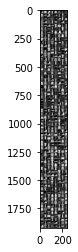

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import fminstModels

net = fminstModels.Net()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
       BatchNorm2d-3           [-1, 32, 28, 28]              64
           Dropout-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 32, 28, 28]           9,248
              ReLU-6           [-1, 32, 28, 28]               0
       BatchNorm2d-7           [-1, 32, 28, 28]              64
           Dropout-8           [-1, 32, 28, 28]               0
            Conv2d-9           [-1, 32, 28, 28]           9,248
             ReLU-10           [-1, 32, 28, 28]               0
      BatchNorm2d-11           [-1, 32, 28, 28]              64
          Dropout-12           [-1, 32, 28, 28]               0
        MaxPool2d-13           [-1, 32, 14, 14]               0
           Conv2d-14           [-1

In [0]:
import evascheduler

In [0]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.3605349063873291 Batch_id=117 Accuracy=77.95: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.2146, Accuracy: 7854/10000 (78.54%)

EPOCH: 1


Loss=0.2893064320087433 Batch_id=117 Accuracy=87.69: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1804, Accuracy: 8196/10000 (81.96%)

EPOCH: 2


Loss=0.3172449767589569 Batch_id=117 Accuracy=89.69: 100%|██████████| 118/118 [00:20<00:00,  5.69it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1171, Accuracy: 8829/10000 (88.29%)

EPOCH: 3


Loss=0.28953662514686584 Batch_id=117 Accuracy=90.79: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1102, Accuracy: 8898/10000 (88.98%)

EPOCH: 4


Loss=0.20169077813625336 Batch_id=117 Accuracy=91.60: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0982, Accuracy: 9018/10000 (90.18%)

EPOCH: 5


Loss=0.30367767810821533 Batch_id=117 Accuracy=92.18: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1656, Accuracy: 8344/10000 (83.44%)

EPOCH: 6


Loss=0.18932290375232697 Batch_id=117 Accuracy=93.22: 100%|██████████| 118/118 [00:20<00:00,  5.65it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0898, Accuracy: 9102/10000 (91.02%)

EPOCH: 7


Loss=0.22730745375156403 Batch_id=117 Accuracy=93.49: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0933, Accuracy: 9067/10000 (90.67%)

EPOCH: 8


Loss=0.11656542867422104 Batch_id=117 Accuracy=93.68: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0906, Accuracy: 9094/10000 (90.94%)

EPOCH: 9


Loss=0.15500657260417938 Batch_id=117 Accuracy=93.75: 100%|██████████| 118/118 [00:20<00:00,  5.71it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0941, Accuracy: 9059/10000 (90.59%)

EPOCH: 10


Loss=0.2527189552783966 Batch_id=117 Accuracy=93.71: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0892, Accuracy: 9108/10000 (91.08%)

EPOCH: 11


Loss=0.14567504823207855 Batch_id=117 Accuracy=93.81: 100%|██████████| 118/118 [00:20<00:00,  5.65it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0919, Accuracy: 9081/10000 (90.81%)

EPOCH: 12


Loss=0.1722264438867569 Batch_id=117 Accuracy=93.94: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0906, Accuracy: 9094/10000 (90.94%)

EPOCH: 13


Loss=0.3213872015476227 Batch_id=117 Accuracy=93.92: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0901, Accuracy: 9099/10000 (90.99%)

EPOCH: 14


Loss=0.10457098484039307 Batch_id=117 Accuracy=94.14: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0902, Accuracy: 9098/10000 (90.98%)

EPOCH: 15


Loss=0.1712934970855713 Batch_id=117 Accuracy=94.12: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0912, Accuracy: 9088/10000 (90.88%)

EPOCH: 16


Loss=0.13009046018123627 Batch_id=117 Accuracy=94.12: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0915, Accuracy: 9085/10000 (90.85%)

EPOCH: 17


Loss=0.10986442118883133 Batch_id=117 Accuracy=94.08: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0906, Accuracy: 9094/10000 (90.94%)

EPOCH: 18


Loss=0.2793615758419037 Batch_id=117 Accuracy=94.17: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0907, Accuracy: 9093/10000 (90.93%)

EPOCH: 19


Loss=0.14399302005767822 Batch_id=117 Accuracy=94.06: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]



Test set: Average loss: 0.0909, Accuracy: 9091/10000 (90.91%)



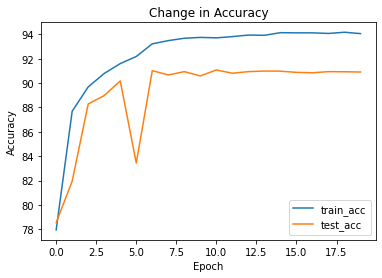

In [0]:
from evascheduler import draw_graph
draw_graph()

In [0]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [0]:
import utils
from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")

25


RuntimeError: ignored

<Figure size 720x720 with 0 Axes>